In [1]:
from importer import *
import numpy as np
import matplotlib.pyplot as plt

import marvin

from importlib import reload

/usr/data/minhas/zpace/miniconda3/envs/MaNGA-stacking/lib/python3.7/site-packages/marvin/__init__.py:128: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
/usr/data/minhas/zpace/miniconda3/envs/MaNGA-stacking/lib/python3.7/site-packages/marvin/extern/tree/python/tree/__init__.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(ff)
/usr/data/minhas/zpace/miniconda3/envs/MaNGA-stacking/lib/python3.7/site-packages/marvin/extern/sdss_access/python/sdss_access/__init__.py:31: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(ff)


INFO: No release version set. Setting default to MPL-8
----Marvin Configuration-----
	Release: MPL-8
		DRP: v2_5_3
		DAP: 2.3.0
			Bin Type: SPX
			Template Type: MILESHC-MILESHC
	Local SAS: /usr/data/minhas2/zpace/sdss/sas
	Download: True
	Access: collab


In [2]:
drpall = marvin.utils.general.general.get_drpall_table()
drpall

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes21,bytes11,bytes22,bytes6,bytes6,bytes6,bytes7,bytes4,bytes14,bytes12,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes35,int64,bytes11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes19,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v2_5_3,v2_5_3,v1_7_1,v5_5_33,v2_6,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.2774,41.5828,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78276,1.85945,2.13116,0.899192,0.930249,0.936709,57372,57373,57373,2.69856,2.64784,2.60184,2.54916,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.66562,0.705713,203,1350,6,v1_0_1,51226,-999,0.0392074,0.0395926,-16.2982 .. -19.5112,-16.2321 .. -19.5522,275.541 .. 452.944,3068010000.0,2685340000.0,0.417013,69.2463,0.448783 .. 0.0800664,5.16633,3.63987,12.7947 .. 413.049,3.26768 .. 0.000422625,13.8306 .. 425.941,3.03694 .. 0.00496838,0.335333,0.741845,68.2584,5.29184,14.8124 .. 412.19,2.50888 .. 0.0150605
10001,12702,10001-12702,1-48188,v2_5_3,v2_5_3,v1_7_1,v5_5_33,v2_6,APOGEE-2&MaNGA,MaNGA dither,133.685669869,57.4802503218,159.390126911,39.0253440844,133.68567,57.48025,0.0492053,9,8100.81,0,20.2774,41.5828,ma078,25,3,9114,134.41357,57.604214,1.10569,1.15089,1.21106,1.78276,1.85945,2.13116,0.899192,0.930249,0.936709,57372,57373,57373,2.72612,2.66367,2.64802,2.61804,2080,0,0,1,plateTargets-1.par,6013,J085444.56+572848.8,127,217,0,0.0408108,0.0193227,0.0264533,0.0386469,0.042869,0.0188554,0.0266531,0.794785,-999.0,0.651037,0.681893,1.04947,1.13205,-999.0,0.631507,0.660498,35,3600,5,v1_0_1,51261,-999,0.0408108,0.0411932,-15.9069 .. -19.6569,-16.127 .. -19.5493,206.664 .. 49.3569,5341650000.0,4642460000.0,0.598115,12.5169,0.405779 .. 0.072394,7.01311,6.11281,12.4553 .. 396.399,2.27628 .. 0.000372112,12.4406 .. 390.985,2.3517 .. 0.000398299,0.508217,1.44272,12.3759,8.34906,10.1128 .. 432.884,3.38905 .. 0.00964978
10001,12703,10001-12703,1-55648,v2_5_3,v2_5_3,v1_7_1,v5_5_33,v2_6,APOGEE-2&MaNGA,MaNGA dither,136.017159969,57.0923291779,159.56459216,40.3368076472,136.01716,57.092329,0.0258626,9,8100.81,0,20.1021,41.12,ma077,31,3,9114,134.41357,57.604214,1.09975,1.13824,1.19323,1.78276,1.85945,2.13116,0.899192,0.930249,0.936709,57372,57373,57373,2.73257,2.6198,2.57125,2.53382,2080,0,0,1,p

In [195]:
dap_maps = marvin.tools.Maps('8083-12704', bintype=DAPBINTYPE, template=DAPTEMPLATETYPE)

In [208]:
import bins
reload(bins)

<module 'bins' from '/usr/data/minhas/zpace/dyson/bins.py'>

Begin by setting up bins

In [209]:
bin_BPT = bins.BPTBinMarvin('BPTclass', 0) # BPT class [SF, comp, seyfert, liner]

fn_ewHa = lambda marvin_maps: marvin_maps.getMap('emline_sew', 'ha_6564')
bin_ewHa = bins.BinDef('ewHa', [1.0e-5, 3., 8., 14., np.inf], 1, fn=fn_ewHa) # EW of Ha emission (DIG proxy--Lacerda+17)

fn_OiiiOii = lambda marvin_maps: marvin_maps.getMapRatio('emline_gflux', 'oiii_5007', 'oii_3727')
bin_OiiiOii = bins.BinDef('OiiiOii', np.logspace(-1., 2, 10), 2, fn=fn_OiiiOii) # ionization parameter sensitive oiii5007/oii3727

fn_BaDec = lambda marvin_maps: marvin_maps.getMapRatio('emline_gflux', 'ha_6563', 'hb_4861')
bin_BaDec = bins.BinDef('HaHb', np.arange(3.25, 6., .25), 3, fn=fn_BaDec)

fn_Rreff = lambda marvin_maps: marvin_maps.bin_lwellcoo_r_re
bin_Rreff = bins.BinDef('Rreff', np.array([0., 0.25, 0.5, 0.75, 1., 1.5, 2., 2.5, 3., 4., np.inf]), 4, fn=fn_Rreff)

binner = bins.Binner([bin_BPT, bin_ewHa, bin_OiiiOii, bin_Rreff])

bin_assignments = binner([dap_maps, dap_maps, dap_maps, dap_maps])

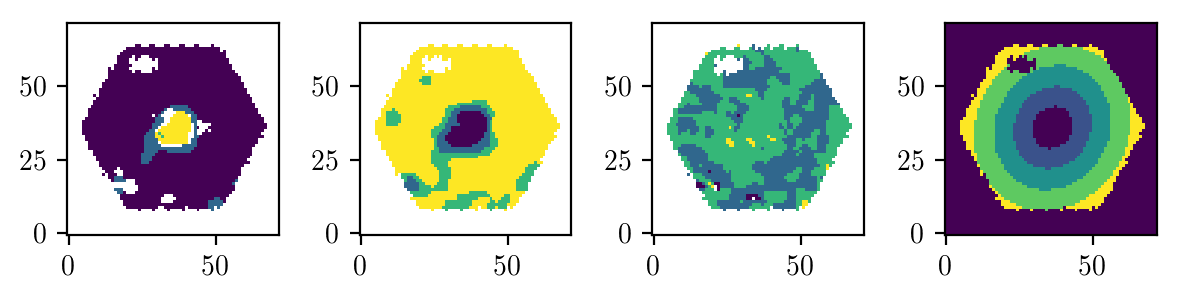

In [192]:
fig, axs = plt.subplots(nrows=1, ncols=len(bin_assignments), figsize=(6, 3), dpi=200)
for ax, assgn in zip(axs, bin_assignments):
    ax.imshow(assgn, origin='lower')
plt.tight_layout()
plt.show()

In [212]:
binner.table

num,BPTclass_llim,BPTclass_ulim,BPTclass_ix,ewHa_llim,ewHa_ulim,ewHa_ix,OiiiOii_llim,OiiiOii_ulim,OiiiOii_ix,Rreff_llim,Rreff_ulim,Rreff_ix
int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64
0,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,0.0,0.25,0
1,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,0.25,0.5,1
2,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,0.5,0.75,2
3,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,0.75,1.0,3
4,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,1.0,1.5,4
5,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,1.5,2.0,5
6,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,2.0,2.5,6
7,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,2.5,3.0,7
8,-0.5,0.5,0,1e-05,3.0,0,0.1,0.21544346900318834,0,3.0,4.0,8
